# Visualize Patches

To generate sequential patches from one big image, run script in `matter-density-superresolution/exploration-2.ipynb`

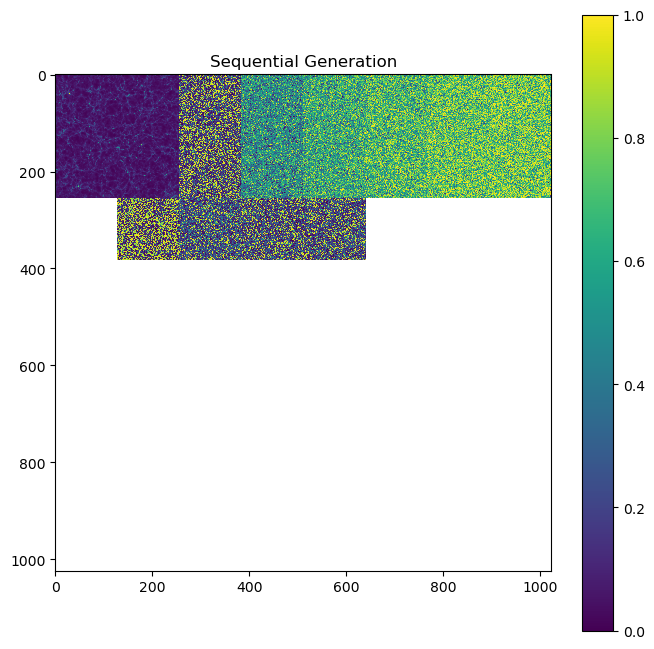

In [2]:
import matplotlib.pyplot as plt

from compile_patches import compile_patches

full = compile_patches(
    directory='../matter-density-superresolution/tile-1/sr-1',
    i=0,
    full_size=1024,
    patch_size=256,
    stride=256//2,
    apply_mask=True,
    # until_x=0,
    # until_y=128,
    bg_fill=float('NaN')
)

crop_x = crop_y = 1024
# crop_x = 256
# crop_y = 1024

figure = plt.figure(figsize=(8, 8))
# figure.suptitle(title)
figure.add_subplot(1, 1, 1)

plt.imshow(full[:crop_x, :crop_y], interpolation='none')
# plt.clim(scale_min, scale_max)
plt.colorbar()
plt.title('Sequential Generation')
plt.show()

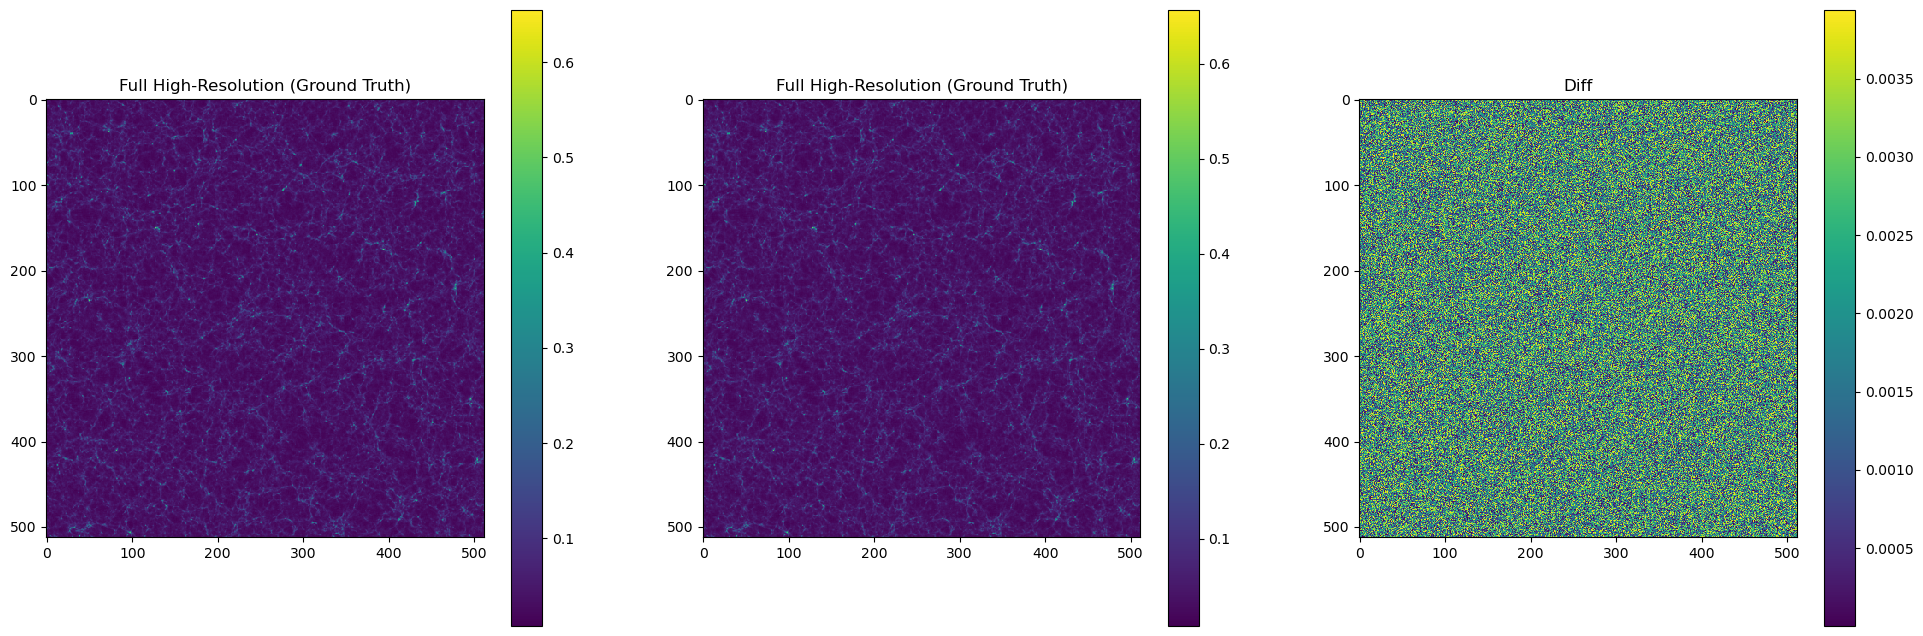

In [3]:
"""
Compare patched together images vs original numpy
"""

import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

def softplus_np(x): return np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0)

tfs = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.Grayscale(num_output_channels=1),
])

data = np.load('../matter-density-superresolution/datasets/first/pairs.npy')
data = softplus_np(data)

min_val = np.amin(data.flatten())
max_val = np.amax(data.flatten())

def normalize(arr):
    return (arr - min_val) / (max_val - min_val)

crop = 256 * 2

figure = plt.figure(figsize=(24, 8))
# figure.suptitle(title)

figure.add_subplot(1, 3, 1)
plt.imshow(full[:crop, :crop], interpolation='none')
# plt.clim(scale_min, scale_max)
plt.colorbar()
plt.title('Full High-Resolution (Ground Truth)')

og_hr = normalize(data[0, 0, :crop, :crop])

figure.add_subplot(1, 3, 2)
plt.imshow(og_hr, interpolation='none')
# plt.clim(scale_min, scale_max)
plt.colorbar()
plt.title('Full High-Resolution (Ground Truth)')


full_compare = full[:crop, :crop]
og_compare = og_hr.astype(np.float32)

figure.add_subplot(1, 3, 3)
plt.imshow((full_compare - og_compare).abs(), interpolation='none')
plt.colorbar()
plt.title('Diff')

plt.show()